#12141617 정규호   
I basically refered to the codes we have gone through during the class.   
However, I tried to read and write the codes by myself, understand and explain what is happening throughout the progress.   
"imports", "prepare data" codes have been brought from the class' example, since these are not the key parts of implementing handwritten digits classifier.

#Imports

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

Imported some essential libraries for this homework.   
Numpy is used for manipulating dataset numerically.   
Keras has been imported to use machine learning libraries.   
Matplotlib has been imported to visualise handwritten digits and statistics about the result.   


#Prepare Data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


The train datasets and test datasets have been brought from keras library. They are called MNIST dataset. These have been saved to x_train, y_train, x_test, and y_test.   
Next, the x components of datasets have been scaled through numpy, adding dimension to the dataset.   
Then, I have printed the shape of data set, and then printed the number of train and test samples we have from MNIST.   
At last, I have converted the y components of datasets from class vectors to binary class matrices.

#Make Model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

This is the step where we are building the learning model.   
These mostly use layers, imported from keras.   
To be honest, I still do not understand the logic here completely, so I have gone through the documentation: https://keras.io/guides/sequential_model/, and had to follow based on what we have gone through during the class.   
Conv2D is usually used on 2-dimensional images or videos. Since we are dealing with 2D images, using Conv2D is suitable.   
Dense is used to make layers for our training model.      
At last, we print the summary of the model we have created.

#Setting Training Parameter and Training

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 4s 83us/sample - loss: 0.3846 - accuracy: 0.8823 - val_loss: 0.0855 - val_accuracy: 0.9763
Epoch 2/15
54000/54000 [==============================] - 2s 35us/sample - loss: 0.1164 - accuracy: 0.9643 - val_loss: 0.0589 - val_accuracy: 0.9825
Epoch 3/15
54000/54000 [==============================] - 2s 36us/sample - loss: 0.0858 - accuracy: 0.9738 - val_loss: 0.0480 - val_accuracy: 0.9852
Epoch 4/15
54000/54000 [==============================] - 2s 36us/sample - loss: 0.0715 - accuracy: 0.9778 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 5/15
54000/54000 [==============================] - 2s 35us/sample - loss: 0.0638 - accuracy: 0.9806 - val_loss: 0.0391 - val_accuracy: 0.9902
Epoch 6/15
54000/54000 [==============================] - 2s 35us/sample - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 7/15
54000/54000 [==============================] -

This is the step where we compile our model.   
We use model.compile to compile the model. The parameters are optimizer, loss, metrices, loss_weights, sample_weight_mode, weighted_matrices, and target_tensors; we only used the first three among them.   
history uses the train set data to train our model. It uses the batch size and epochs as we initialized at the top of this code block.   
Since the model has to learn through the training dataset, it takes a bit of time to finish its 15th epoch.

#Performance Evaluation on Test Set

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025738364310568432
Test accuracy: 0.9906


We can evaluate our mode through model.evaluate.   
The parameters are our test dataset; x_test, y_test, and verbose=0; we have not used the rest of the parameters.

#Sample Prediction

Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 7


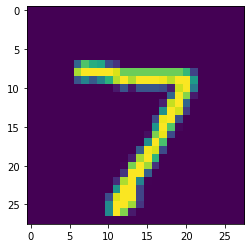

Predicted Image Label Array:
0.00
0.00
0.00
0.00
0.00
0.00
0.00
1.00
0.00
0.00
Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 7


In [6]:
img_id = 0

sample_test_image = x_test[img_id]
sample_test_label = y_test[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label, 
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', np.argmax(sample_test_label))
plt.imshow(sample_test_image.reshape(28, 28), interpolation='nearest')
plt.show()

prediction = model.predict(sample_test_image.reshape(1, 28, 28, 1))
print('Predicted Image Label Array:')
print(*['{0:0.2f}'.format(i) for i in prediction[0]], sep='\n')
print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape, 
      '\nPredicted Image Label:', np.argmax(prediction))

Based on the model we made, we can classify a test hadwritten digit, as above. We have a handwritten 7, of which the classifier has correctly recognized.

Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 7


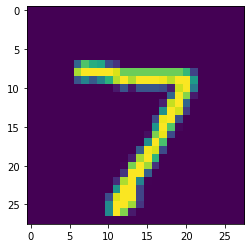

Predicted Image Label Array:
0.00
0.00
0.00
0.00
0.00
0.00
0.00
1.00
0.00
0.00
Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 7
Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 2


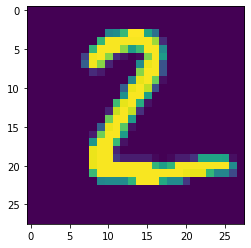

Predicted Image Label Array:
0.00
0.00
1.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
Predicted Image Label Array: ['0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 2
Image shape: (28, 28, 1)
True Image Label Array: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 1


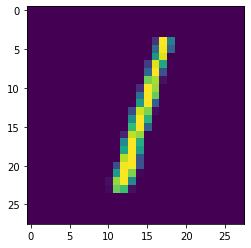

Predicted Image Label Array:
0.00
1.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
Predicted Image Label Array: ['0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 1
Image shape: (28, 28, 1)
True Image Label Array: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 0


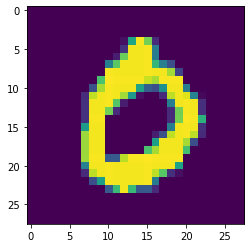

Predicted Image Label Array:
1.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
Predicted Image Label Array: ['1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 0
Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 4


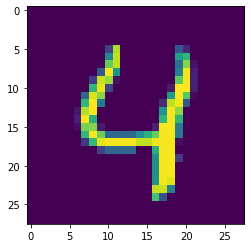

Predicted Image Label Array:
0.00
0.00
0.00
0.00
1.00
0.00
0.00
0.00
0.00
0.00
Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 4
Image shape: (28, 28, 1)
True Image Label Array: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 1


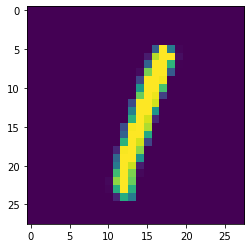

Predicted Image Label Array:
0.00
1.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
Predicted Image Label Array: ['0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 1
Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 4


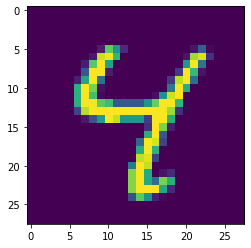

Predicted Image Label Array:
0.00
0.00
0.00
0.00
1.00
0.00
0.00
0.00
0.00
0.00
Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 4
Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
True Image Label Shape: (10,) 
True Image Label: 9


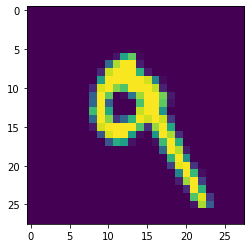

Predicted Image Label Array:
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
1.00
Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 9
Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 5


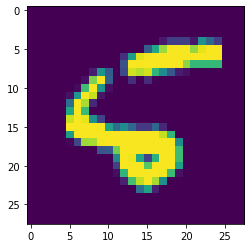

Predicted Image Label Array:
0.00
0.00
0.00
0.00
0.00
1.00
0.00
0.00
0.00
0.00
Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 5


In [7]:
for i in range (0,9):
    img_id = i

    sample_test_image = x_test[img_id]
    sample_test_label = y_test[img_id]

    print('Image shape:', sample_test_image.shape)
    print('True Image Label Array:', sample_test_label, 
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', np.argmax(sample_test_label))
    plt.imshow(sample_test_image.reshape(28, 28), interpolation='nearest')
    plt.show()

    prediction = model.predict(sample_test_image.reshape(1, 28, 28, 1))
    print('Predicted Image Label Array:')
    print(*['{0:0.2f}'.format(i) for i in prediction[0]], sep='\n')
    print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape, 
      '\nPredicted Image Label:', np.argmax(prediction))

In order to get more out of our model, I have used a loop to test out some of the test datasets, to see whether the model can correctly classify the number.

#Visualise

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


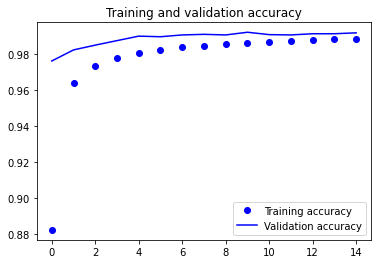

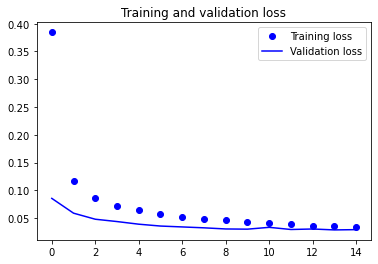

In [8]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)), train_accuracy, 'bo', label='Training accuracy')
plt.plot(list(range(epochs)), val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(epochs)), train_loss, 'bo', label='Training loss')
plt.plot(list(range(epochs)), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, I have visualised the data through matplotlib. The two graphs show about training and validation; one for accuracy and the other for loss.

#Summary
Even though I stil have not completely understood about CNN and handwritten number classifier, I have learned how we can build a model and train it through dataset. What made me surprised is that the model we have used to train can actually used to classify a dataset, even though it is a test data. Going through number classification was very interesting, and I had lots to learn from it.